In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import shap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [3]:
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [5]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.39      0.51        36
     neutral       0.48      0.87      0.62        30
    positive       0.81      0.65      0.72        34

    accuracy                           0.62       100
   macro avg       0.68      0.63      0.62       100
weighted avg       0.69      0.62      0.61       100



In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'Decision Boundary of Logistic Regression')

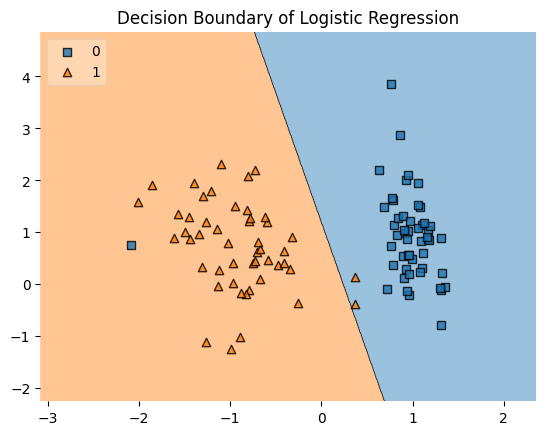

In [7]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
model = LogisticRegression().fit(X, y)

plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title("Decision Boundary of Logistic Regression")